In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/4407050e9b8216249a6d5ff22fd67fd4c44e7301/click_data.csv'
df = pd.read_csv(link, parse_dates = ['visit_date'])

In [57]:
df.tail()

,visit_date,clicked_adopt_today
3645,2017-12-27,1
3646,2017-12-28,0
3647,2017-12-29,0
3648,2017-12-30,1
3649,2017-12-31,0


In [58]:
df.visit_date.min()

Timestamp('2017-01-01 00:00:00')

In [59]:
df.visit_date.max()

Timestamp('2017-12-31 00:00:00')

In [60]:
conversion_rate = np.mean(df.clicked_adopt_today)
conversion_rate

0.2772602739726027

In [61]:
df.head()

,visit_date,clicked_adopt_today
0,2017-01-01,1
1,2017-01-02,1
2,2017-01-03,0
3,2017-01-04,1
4,2017-01-05,1


In [53]:
df.info

<bound method DataFrame.info of      visit_date  clicked_adopt_today
0    2017-01-01                    1
1    2017-01-02                    1
2    2017-01-03                    0
3    2017-01-04                    1
4    2017-01-05                    1
...         ...                  ...
3645 2017-12-27                    1
3646 2017-12-28                    0
3647 2017-12-29                    0
3648 2017-12-30                    1
3649 2017-12-31                    0

[3650 rows x 2 columns]>

In [62]:
import datetime as dt
df['Month'] = df['visit_date'].dt.month

In [64]:
df.tail()

,visit_date,clicked_adopt_today,Month
3645,2017-12-27,1,12
3646,2017-12-28,0,12
3647,2017-12-29,0,12
3648,2017-12-30,1,12
3649,2017-12-31,0,12


In [73]:
conversion_rate_by_month = df.groupby(['Month'])['clicked_adopt_today'].mean()

In [75]:
conversion_rate_by_month = pd.DataFrame(conversion_rate_by_month)

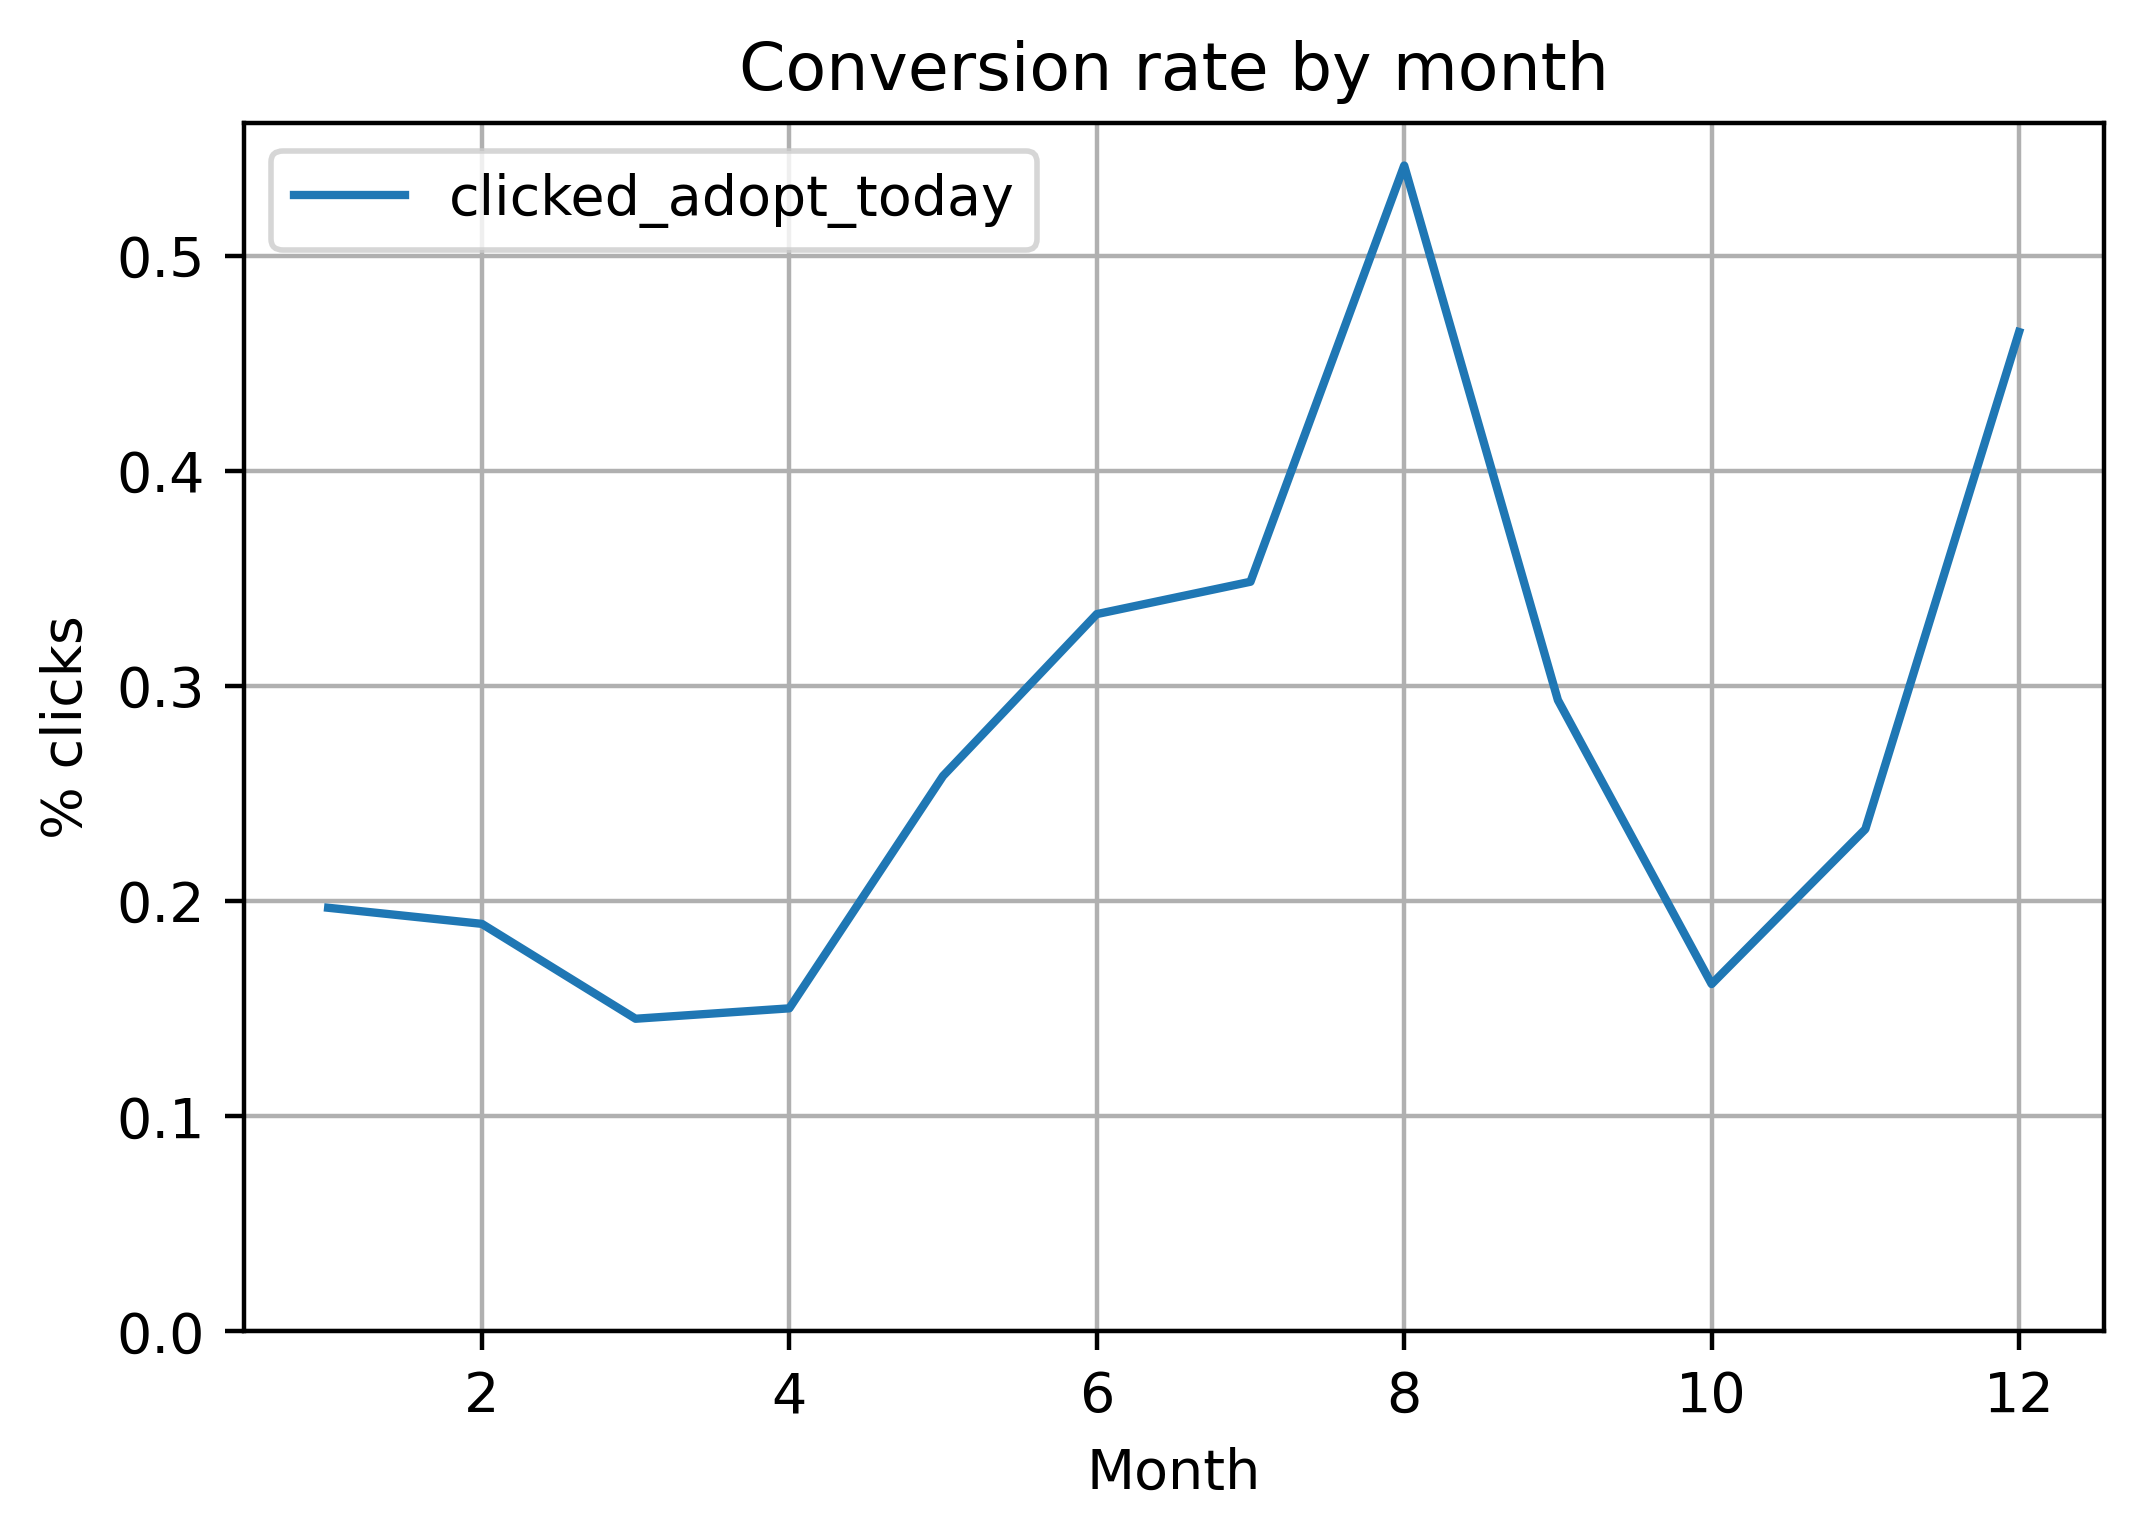

In [80]:
conversion_rate_by_month.plot()
plt.title('Conversion rate by month')
plt.xlabel('Month')
plt.ylabel('% clicks')
plt.ylim(0)
plt.grid()
plt.show()

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


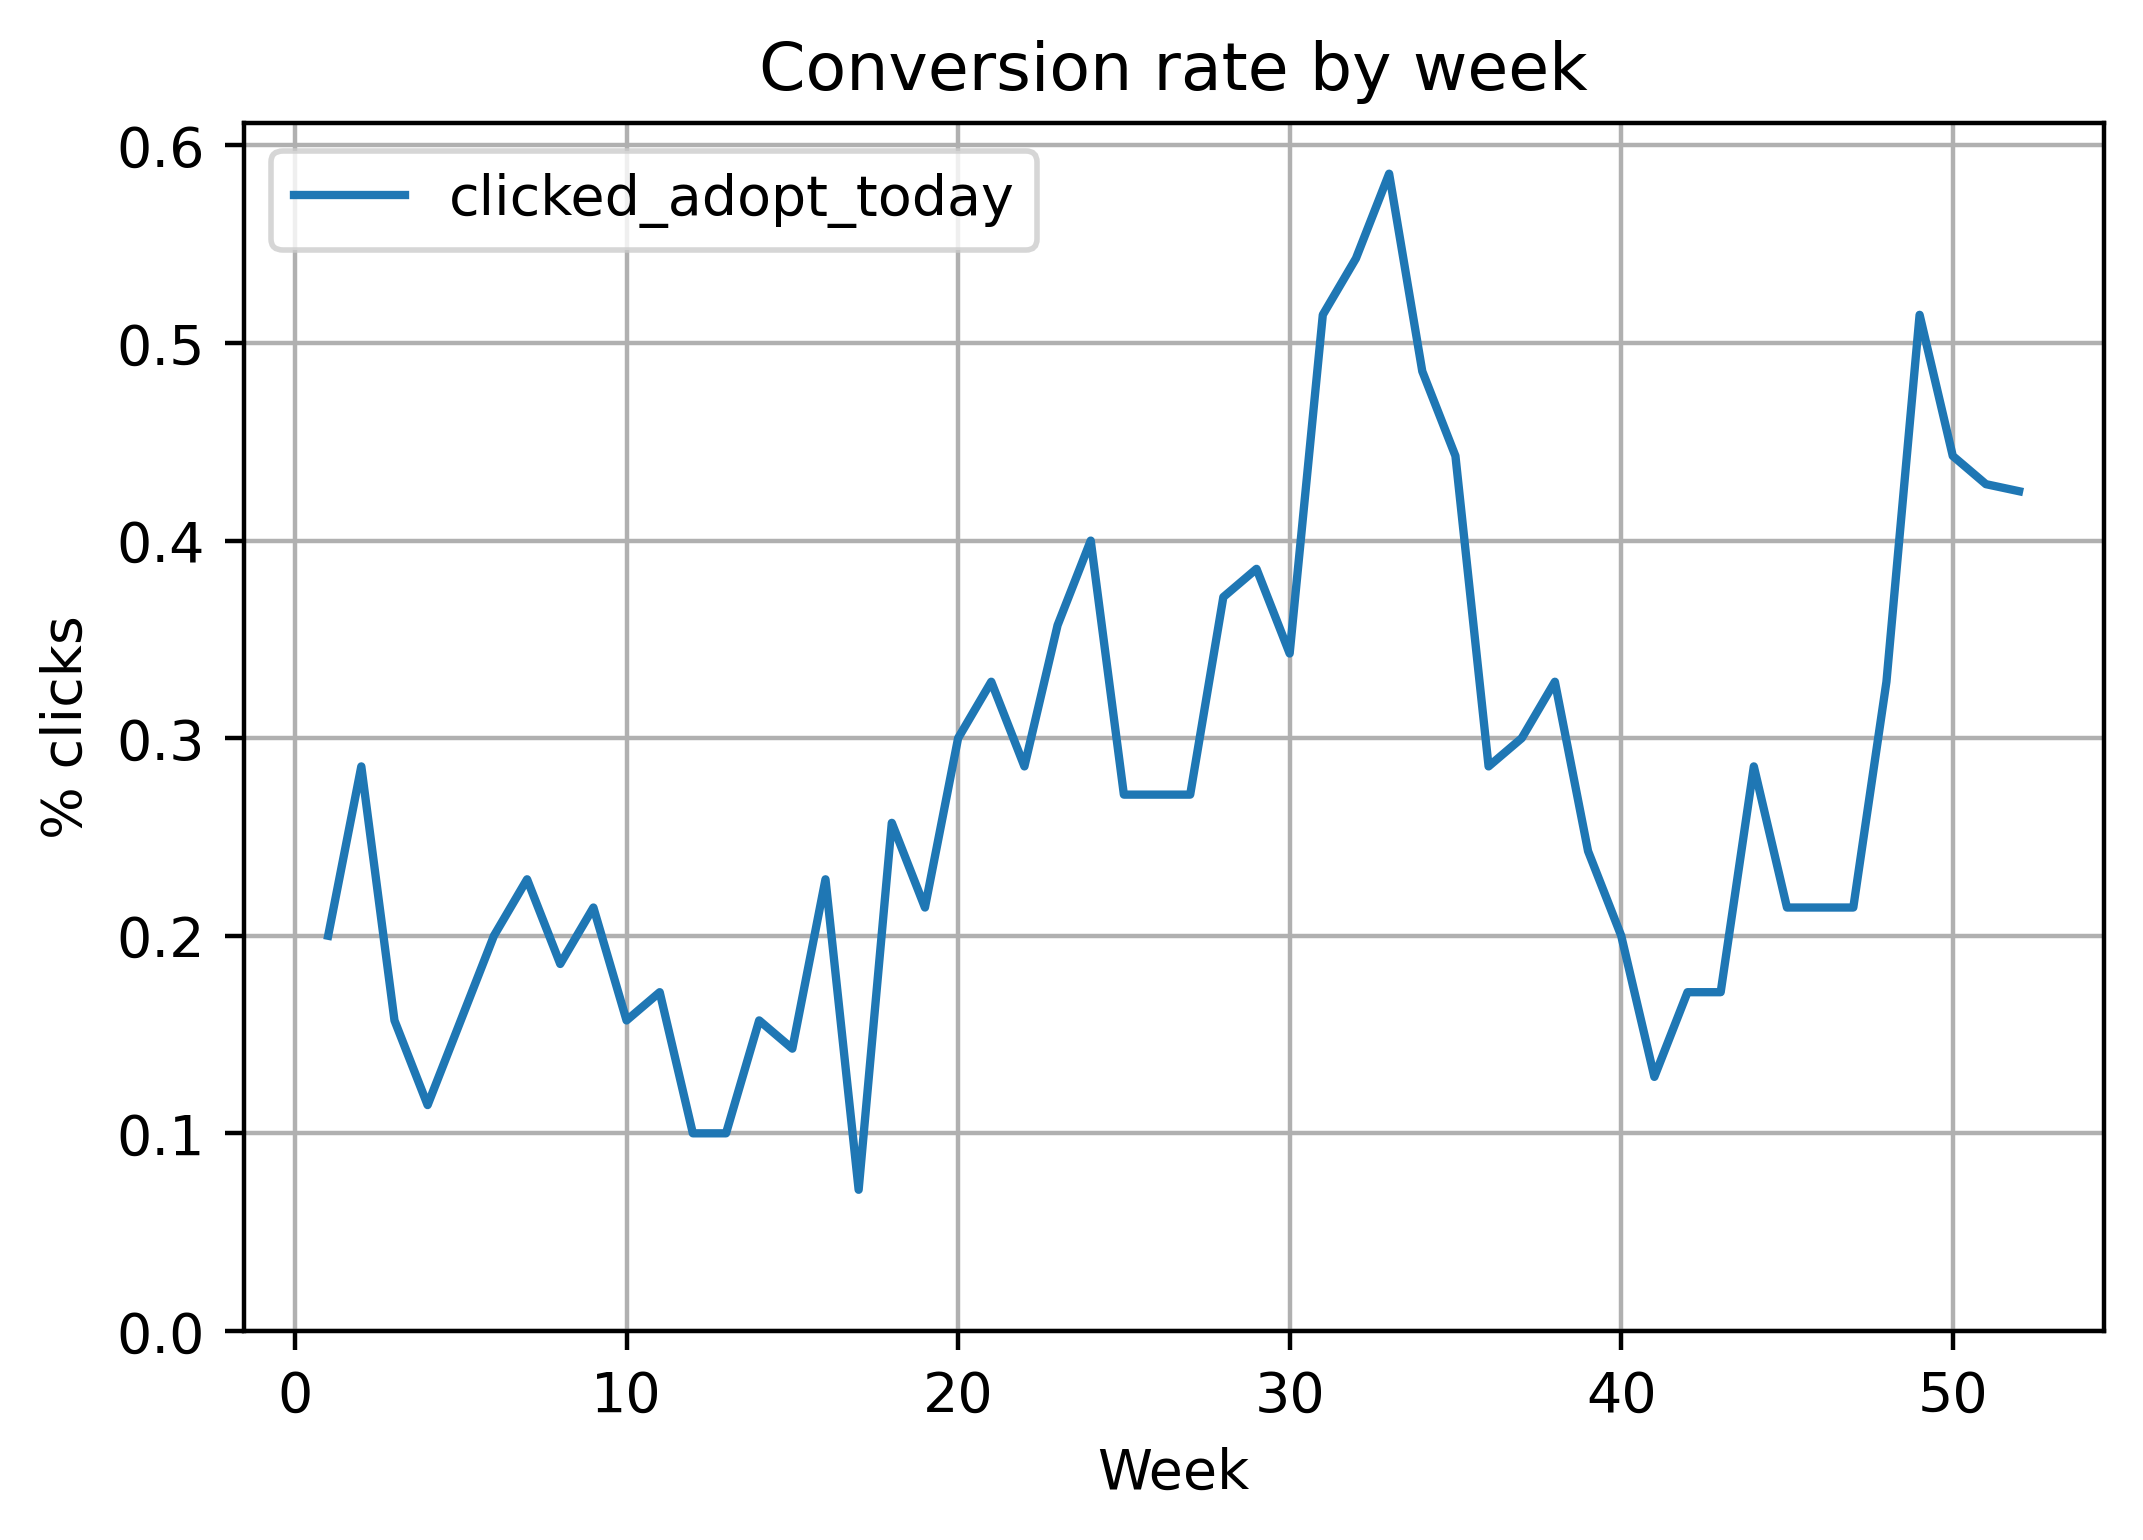

In [82]:
df['week'] = df['visit_date'].dt.week
conversion_rate_by_week = df.groupby(['week'])['clicked_adopt_today'].mean()
conversion_rate_by_week = pd.DataFrame(conversion_rate_by_week)
conversion_rate_by_week.plot()
plt.title('Conversion rate by week')
plt.xlabel('Week')
plt.ylabel('% clicks')
plt.ylim(0)
plt.grid()
plt.show()

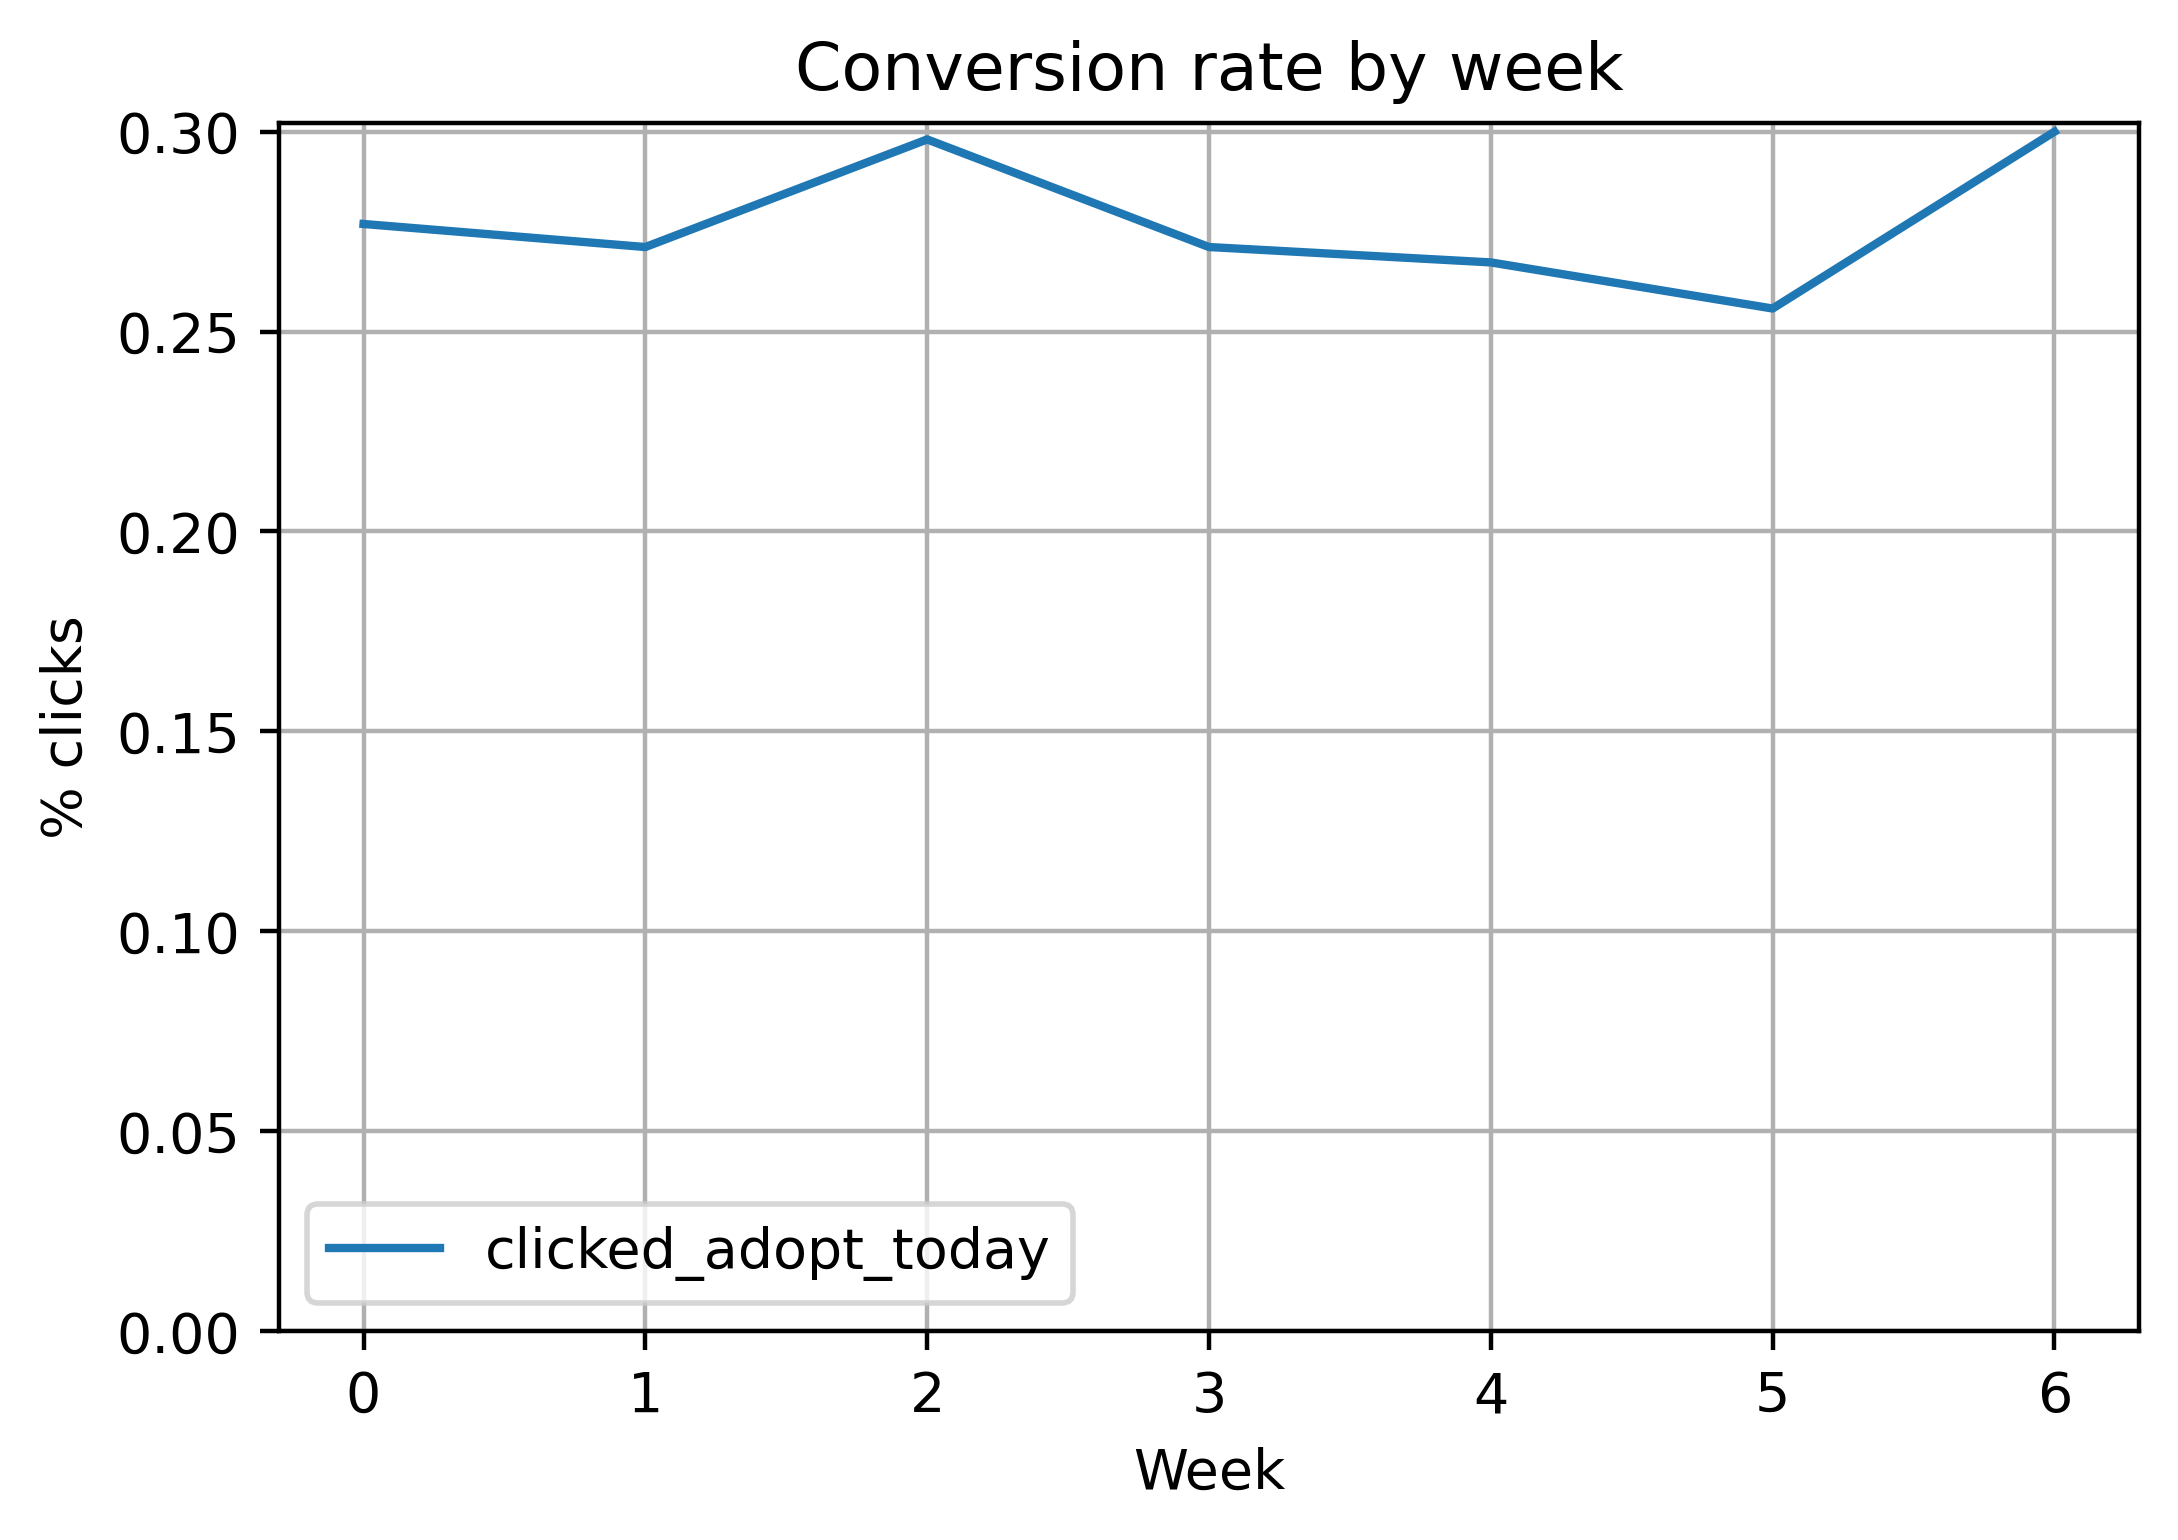

In [84]:
df['DoW'] = df['visit_date'].dt.dayofweek
conversion_rate_by_DoW = df.groupby(['DoW'])['clicked_adopt_today'].mean()
conversion_rate_by_DoW= pd.DataFrame(conversion_rate_by_DoW)
conversion_rate_by_DoW.plot()
plt.title('Conversion rate by week')
plt.xlabel('Week')
plt.ylabel('% clicks')
plt.ylim(0)
plt.grid()
plt.show()

In [103]:
from statsmodels.stats.power import TTestIndPower
import math

def sample_size_calculator(rA, diff, alpha=0.05, ratio=1.0, power=0.8):
    # parameters for power analysis 
    """
    -return sample size for the AB test given 
    -baseline conversion rate rA 
    -required minimum difference dr = rB-rA,
    -significance level alpha
    -statistical power 1-beta
    """

    rA = rA
    dr = diff
    rB = rA+dr
    r = (rA+rB)/2
    pooled_var = 2*r*(1-r) # rA*(1-rA) + rB*(1-rB)
    effect_size = dr/np.sqrt(pooled_var)

    alpha = alpha
    power = power 
    ratio = ratio# how balaned is your dataset
    # perform power analysis
    analysis = TTestIndPower()
    result = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio, alpha=alpha)
    print('Effect size: {:.2f}, and total sample size: {}'.format(effect_size,math.ceil(result)))
    print('Or sample size by condition: {}'.format(math.ceil(result/2)))

sample_size_calculator(0.2, 0.1)

Effect size: 0.16, and total sample size: 590
Or sample size by condition: 295


In [104]:
sample_size_calculator(0.54, 0.1)

Effect size: 0.14, and total sample size: 761
Or sample size by condition: 381


In [105]:
sample_size_calculator(0.54, 0.05)

Effect size: 0.07, and total sample size: 3088
Or sample size by condition: 1544
